In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.express as px

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from joblib import dump, load

## DRUGS:

In [46]:
drugsx = pd.read_csv(r'drugs_x_train.csv')
drugsy = pd.read_csv(r'drugs_y_train.csv')
drugsx.drop(['Sex_M', 'Sex_F', 'BP_LOW', 'BP_NORMAL','Cholesterol_NORMAL'], axis=1, inplace=True)
drugsx

,Age,Na_to_K,BP_HIGH,Cholesterol_HIGH
0,0.593220,0.297736,0,0
1,0.830508,0.458534,1,0
2,0.796610,0.322878,0,1
3,0.677966,0.147226,1,1
4,0.881356,0.144756,0,0
...,...,...,...,...
129,0.118644,0.177747,0,1
130,0.593220,0.201201,0,1
131,0.237288,0.724905,1,1
132,0.881356,0.300894,0,1


In [47]:
X_train, X_test, y_train, y_test = train_test_split(drugsx, drugsy, random_state=0, train_size=0.8)
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values
clf = MLPClassifier(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)
model_file = "drugmodel_final.joblib"
dump(clf, model_file)

def one_hot_encoding(nd_array):
    one_hot_encoding_predictions = nd_array

    for i in range(len(nd_array)):
        max_pred = max(nd_array[i])

        for j in range(len(nd_array[i])):
            one_hot_encoding_predictions[i][j] = 1 if nd_array[i][j] == max_pred else 0

    return one_hot_encoding_predictions

predictions = clf.predict_proba(X_test)
predictions = one_hot_encoding(predictions)
benchmarks = multilabel_confusion_matrix(y_test, predictions)
report_new = classification_report(y_test, predictions, zero_division = 0)
print(report_new)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       0.17      1.00      0.29         1

   micro avg       0.74      1.00      0.85        20
   macro avg       0.76      1.00      0.80        20
weighted avg       0.87      1.00      0.92        20
 samples avg       0.74      0.74      0.74        20



c:\Training\Demo\Python\localenvs\mltool\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## WHITE WINE:

In [48]:
redx = pd.read_csv('winequality_red_x_train.csv')
redy = pd.read_csv('winequality_red_y_train.csv')
redy['wine_labels'] = redy.idxmax(1)
x = pd.concat([redx, redy['wine_labels']], axis=1)
x['wine_labels'] = x['wine_labels'].astype('float')
x_normalized = (x - x.min()) / (x.max() - x.min())
x_normalized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_labels
0,0.690265,0.190083,0.49,0.116438,0.111853,0.388060,0.222615,0.685022,0.299213,0.233129,0.307692,0.6
1,0.185841,0.520661,0.01,0.102740,0.110184,0.238806,0.091873,0.398678,0.637795,0.147239,0.676923,0.6
2,0.176991,0.421488,0.00,0.232877,0.135225,0.746269,0.252650,0.404552,0.362205,0.049080,0.169231,0.4
3,0.566372,0.148760,0.58,0.082192,0.070117,0.089552,0.045936,0.582232,0.448819,0.312883,0.323077,0.8
4,0.336283,0.516529,0.11,0.068493,0.130217,0.223881,0.201413,0.472100,0.354331,0.276074,0.184615,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0.398230,0.396694,0.00,0.068493,0.076795,0.059701,0.014134,0.560206,0.346457,0.159509,0.307692,0.6
1067,0.318584,0.425620,0.10,0.082192,0.101836,0.358209,0.190813,0.463289,0.433071,0.233129,0.384615,0.6
1068,0.230088,0.413223,0.06,0.123288,0.108514,0.208955,0.279152,0.542584,0.606299,0.104294,0.169231,0.4
1069,0.292035,0.066116,0.35,0.054795,0.070117,0.089552,0.031802,0.331131,0.456693,0.263804,0.538462,0.8


<AxesSubplot: >

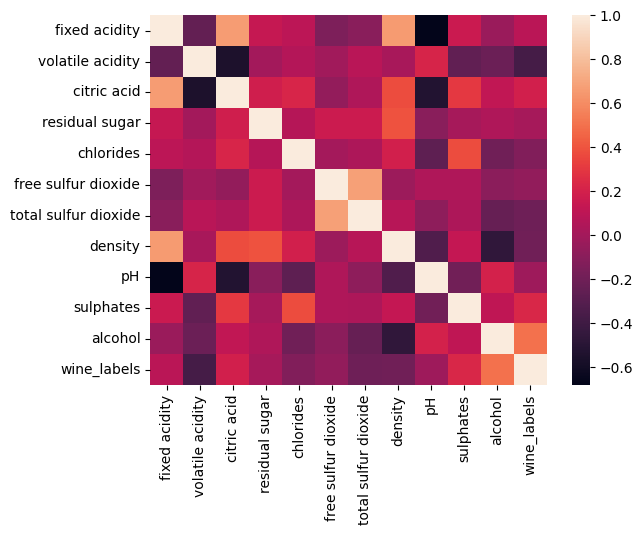

In [49]:
sns.heatmap(x_normalized.corr())

In [50]:
x_relevant = x.drop(['fixed acidity', 'free sulfur dioxide'], axis=1)
x_relevant

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,wine_labels
0,0.157534,0.49,0.116438,0.111853,0.222615,0.685022,0.299213,0.251497,0.307692,6.0
1,0.431507,0.01,0.102740,0.110184,0.091873,0.398678,0.637795,0.167665,0.676923,6.0
2,0.349315,0.00,0.232877,0.135225,0.252650,0.404552,0.362205,0.071856,0.169231,5.0
3,0.123288,0.58,0.082192,0.070117,0.045936,0.582232,0.448819,0.329341,0.323077,7.0
4,0.428082,0.11,0.068493,0.130217,0.201413,0.472100,0.354331,0.293413,0.184615,5.0
...,...,...,...,...,...,...,...,...,...,...
1066,0.328767,0.00,0.068493,0.076795,0.014134,0.560206,0.346457,0.179641,0.307692,6.0
1067,0.352740,0.10,0.082192,0.101836,0.190813,0.463289,0.433071,0.251497,0.384615,6.0
1068,0.342466,0.06,0.123288,0.108514,0.279152,0.542584,0.606299,0.125749,0.169231,5.0
1069,0.054795,0.35,0.054795,0.070117,0.031802,0.331131,0.456693,0.281437,0.538462,7.0


In [51]:
new_x = x_relevant.iloc[:,:-1]
new_y = pd.get_dummies(x_relevant.iloc[:,-1], prefix='y')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(new_x, new_y, random_state=0, train_size=0.8)
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values
clf = MLPClassifier(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)
#model_file = "whitewinemodel_final.joblib"
#dump(clf, model_file)

predictions = clf.predict_proba(X_test)
predictions = one_hot_encoding(predictions)
benchmarks = multilabel_confusion_matrix(y_test, predictions)
report_new = classification_report(y_test, predictions, zero_division = 0)
print(report_new)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         6
           2       0.72      0.70      0.71       104
           3       0.53      0.70      0.60        76
           4       0.79      0.39      0.52        28
           5       0.00      0.00      0.00         0

   micro avg       0.64      0.64      0.64       215
   macro avg       0.34      0.30      0.31       215
weighted avg       0.64      0.64      0.63       215
 samples avg       0.64      0.64      0.64       215



c:\Training\Demo\Python\localenvs\mltool\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## RED WINE:

redx = pd.read_csv('winequality_red_x_train.csv')
redy = pd.read_csv('winequality_red_y_train.csv')
redy['wine_labels'] = redy.idxmax(1)
x = pd.concat([redx, redy['wine_labels']], axis=1)
x['wine_labels'] = x['wine_labels'].astype('float')
x_normalized = (x - x.min()) / (x.max() - x.min())
x_normalized

<AxesSubplot: >

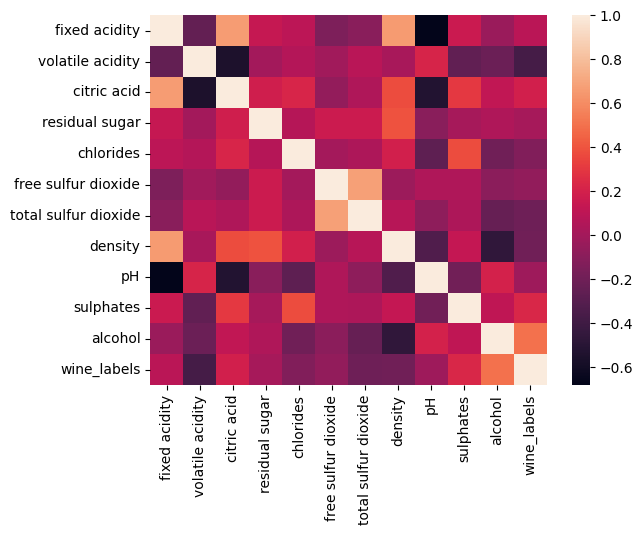

In [53]:
sns.heatmap(x_normalized.corr())

In [54]:
x_relevant = x.drop(['fixed acidity', 'free sulfur dioxide'], axis=1)
x_relevant

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,wine_labels
0,0.157534,0.49,0.116438,0.111853,0.222615,0.685022,0.299213,0.251497,0.307692,6.0
1,0.431507,0.01,0.102740,0.110184,0.091873,0.398678,0.637795,0.167665,0.676923,6.0
2,0.349315,0.00,0.232877,0.135225,0.252650,0.404552,0.362205,0.071856,0.169231,5.0
3,0.123288,0.58,0.082192,0.070117,0.045936,0.582232,0.448819,0.329341,0.323077,7.0
4,0.428082,0.11,0.068493,0.130217,0.201413,0.472100,0.354331,0.293413,0.184615,5.0
...,...,...,...,...,...,...,...,...,...,...
1066,0.328767,0.00,0.068493,0.076795,0.014134,0.560206,0.346457,0.179641,0.307692,6.0
1067,0.352740,0.10,0.082192,0.101836,0.190813,0.463289,0.433071,0.251497,0.384615,6.0
1068,0.342466,0.06,0.123288,0.108514,0.279152,0.542584,0.606299,0.125749,0.169231,5.0
1069,0.054795,0.35,0.054795,0.070117,0.031802,0.331131,0.456693,0.281437,0.538462,7.0


In [55]:
new_x = x_relevant.iloc[:,:-1]
new_y = pd.get_dummies(x_relevant.iloc[:,-1], prefix='y')
X_train, X_test, y_train, y_test = train_test_split(new_x, new_y, random_state=0, train_size=0.8)
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values
clf = MLPClassifier(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)
#model_file = "redwinemodel_final.joblib"
#dump(clf, model_file)

predictions = clf.predict_proba(X_test)
predictions = one_hot_encoding(predictions)
benchmarks = multilabel_confusion_matrix(y_test, predictions)
report_new = classification_report(y_test, predictions, zero_division = 0)
print(report_new)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         6
           2       0.72      0.70      0.71       104
           3       0.53      0.70      0.60        76
           4       0.79      0.39      0.52        28
           5       0.00      0.00      0.00         0

   micro avg       0.64      0.64      0.64       215
   macro avg       0.34      0.30      0.31       215
weighted avg       0.64      0.64      0.63       215
 samples avg       0.64      0.64      0.64       215



c:\Training\Demo\Python\localenvs\mltool\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
